# Cocktails

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data using pandas

In [4]:
df = pd.read_json("C:/Users/domci/PycharmProjects/ml-solvro-recruitment/data/cocktail_dataset.json")

df.sample(n=2).T

,31,85
id,11053,11416
name,Arise My Love,Gin Smash
category,Ordinary Drink,Ordinary Drink
glass,Champagne flute,Old-fashioned glass
tags,None,"[Citrus, StrongFlavor]"
instructions,Put creme de menthe into a champagne flute. Fi...,Muddle sugar with carbonated water and mint sp...
imageUrl,https://cocktails.solvro.pl/images/ingredients...,https://cocktails.solvro.pl/images/ingredients...
alcoholic,1,1
createdAt,2024-08-18T19:06:36.000+00:00,2024-08-18T19:08:40.000+00:00
updatedAt,2024-08-18T19:06:36.000+00:00,2024-08-18T19:08:40.000+00:00


In [5]:
df.head(n=3).T

,0,1,2
id,11000,11001,11002
name,Mojito,Old Fashioned,Long Island Tea
category,Cocktail,Cocktail,Ordinary Drink
glass,Highball glass,Old-fashioned glass,Highball glass
tags,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...","[IBA, Classic, Alcoholic, Expensive, Savory]","[Strong, Asia, StrongFlavor, Brunch, Vegetaria..."
instructions,Muddle mint leaves with sugar and lime juice. ...,Place sugar cube in old fashioned glass and sa...,Combine all ingredients (except cola) and pour...
imageUrl,https://cocktails.solvro.pl/images/ingredients...,https://cocktails.solvro.pl/images/ingredients...,https://cocktails.solvro.pl/images/ingredients...
alcoholic,1,1,1
createdAt,2024-08-18T19:01:17.000+00:00,2024-08-18T19:01:58.000+00:00,2024-08-18T19:01:58.000+00:00
updatedAt,2024-08-18T19:06:16.000+00:00,2024-08-18T19:06:17.000+00:00,2024-08-18T19:06:17.000+00:00


## Preliminary inspection

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            134 non-null    int64 
 1   name          134 non-null    object
 2   category      134 non-null    object
 3   glass         134 non-null    object
 4   tags          35 non-null     object
 5   instructions  134 non-null    object
 6   imageUrl      134 non-null    object
 7   alcoholic     134 non-null    int64 
 8   createdAt     134 non-null    object
 9   updatedAt     134 non-null    object
 10  ingredients   134 non-null    object
dtypes: int64(2), object(9)
memory usage: 11.6+ KB


In [8]:
df.describe()

,id,alcoholic
count,134.000000,134.0
mean,11344.955224,1.0
std,306.506605,0.0
min,11000.000000,1.0
25%,11056.250000,1.0
50%,11304.000000,1.0
75%,11538.500000,1.0
max,11993.000000,1.0


### General observations:
1. List datatype is not useful as it is and needs handling
2. Change categorical columns to category datatype
3. A lot of values in the tags column are missing
4. Out of 11 columns, only two of them are numeric
5. Columns with categorical datatype needs encoding
6. There will be no use from Instructions and ImageUrl columns, because there are no key numeric values to be extracted

#### Check for unique tags

In [11]:
unique_tags = df['tags'].apply(lambda x: x if isinstance(x, list) else []).explode().unique()
unique_tags

array(['IBA', 'ContemporaryClassic', 'Alcoholic', 'USA', 'Asia', 'Vegan',
       'Citrus', 'Brunch', 'Hangover', 'Mild', 'Classic', 'Expensive',
       'Savory', 'Strong', 'StrongFlavor', 'Vegetarian', 'Sour',
       'Christmas', 'Beach', 'DinnerParty', nan, 'Summer', 'Chilli',
       'Dairy', 'Nutty', 'Cold', 'Fruity', 'Breakfast', 'NewEra'],
      dtype=object)

In [12]:
tag_counts = df['tags'].apply(lambda x: x if isinstance(x, list) else []).explode().value_counts()
tag_counts

tags
IBA                    23
ContemporaryClassic    13
Classic                 9
Alcoholic               6
Beach                   3
Brunch                  3
Dairy                   2
Sour                    2
StrongFlavor            2
Asia                    2
Citrus                  2
Hangover                2
Summer                  1
Breakfast               1
Fruity                  1
Cold                    1
Nutty                   1
USA                     1
Chilli                  1
Mild                    1
DinnerParty             1
Christmas               1
Vegan                   1
Vegetarian              1
Strong                  1
Savory                  1
Expensive               1
NewEra                  1
Name: count, dtype: int64

#### Tags column
1. Some of the tags overlap already existing columns like alcoholic or category
2. Create new one hot encoded columns for iba since it appears most often and provides usefull, not duplicated information
3. Missing data: for the cocktails that has no data about the tags, assume that it's not the iba list cocktail, beacuse there is no way to additionaly get that information from the data we aquire

#### Print a sample value in the instructions column to see what may be extracted

In [15]:
print(df.iloc[0][10])

[{'id': 170, 'name': 'Soda water', 'description': None, 'alcohol': 1, 'type': None, 'percentage': None, 'imageUrl': None, 'createdAt': '2024-08-18T19:01:57.000+00:00', 'updatedAt': '2024-08-18T19:01:57.000+00:00'}, {'id': 305, 'name': 'Light Rum', 'description': 'Light rums, also referred to as "silver" or "white" rums, in general, have very little flavor aside from a general sweetness. Light rums are sometimes filtered after aging to remove any colour. The majority of light rums come from Puerto Rico. Their milder flavors make them popular for use in mixed drinks, as opposed to drinking them straight. Light rums are included in some of the most popular cocktails including the Mojito and the Daiquiri.', 'alcohol': 1, 'type': 'Rum', 'percentage': None, 'imageUrl': 'https://cocktails.solvro.pl/images/ingredients/light-rum.png', 'createdAt': '2024-08-18T19:02:37.000+00:00', 'updatedAt': '2024-08-18T19:02:37.000+00:00', 'measure': '2-3 oz '}, {'id': 312, 'name': 'Lime', 'description': 'A l

C:\Users\domci\AppData\Local\Temp\ipykernel_18180\2726895556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.iloc[0][10])


In [79]:
items_counter = {}
for list_of_items in df["ingredients"]:
    for item in list_of_items:
        key_value = item["name"]
        if key_value in items_counter:
            items_counter[key_value] += 1
        else:
            items_counter[key_value] = 1

dict(sorted(counter_ingredients.items(), key=lambda item: item[1], reverse=True))

{'Gin': 45,
 'Light Rum': 20,
 'Triple Sec': 20,
 'Sugar': 19,
 'Lemon Juice': 19,
 'lemon': 17,
 'Powdered Sugar': 17,
 'Lemon Peel': 17,
 'Lime': 15,
 'Dry Vermouth': 14,
 'Carbonated Water': 13,
 'Vodka': 12,
 'Sweet Vermouth': 12,
 'Cherry': 12,
 'Amaretto': 12,
 'Light Cream': 12,
 'Brandy': 12,
 'Bourbon': 11,
 'Lime Juice': 11,
 'Bitters': 11,
 'Grenadine': 10,
 'Maraschino Cherry': 9,
 'Orange': 9,
 'Blended Whiskey': 8,
 'Egg White': 8,
 'Scotch': 7,
 'Creme De Cacao': 6,
 'Benedictine': 6,
 'Water': 5,
 'Apricot Brandy': 5,
 'Orange Bitters': 5,
 'Nutmeg': 5,
 'Pineapple Juice': 5,
 'Club Soda': 5,
 'Tequila': 4,
 'Dark Rum': 4,
 'Orange Juice': 4,
 'Maraschino Liqueur': 4,
 'Port': 4,
 'Mint': 3,
 'Olive': 3,
 'Ginger Ale': 3,
 'Sloe Gin': 3,
 'Kahlua': 3,
 'Blue Curacao': 3,
 'Pineapple': 3,
 'Angostura Bitters': 2,
 'Coca-Cola': 2,
 'Salt': 2,
 'Ice': 2,
 'Orange Peel': 2,
 'Yellow Chartreuse': 2,
 'Apple Brandy': 2,
 'Wine': 2,
 'Champagne': 2,
 'Green Creme de Menthe': 2

In [17]:
len(set(ingredient_list))

102

#### Handling ingredients column
1. Extract an information about the number of ingredients in each drink.
2. There are over a 100 unique ingredients so one-hot-encoding would increase the dimensionality of the dataframe too much. In order to prevent it encode only 20 most used ingredients (ingredients that occured over 10 times).

## Data visualization for more conclusions

#### Plots of categorical data to observe the spread

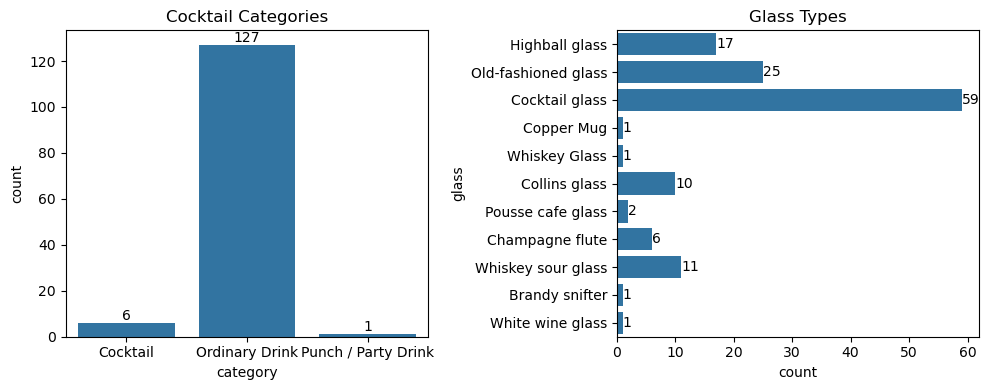

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'category', data = df, ax = axes[0])
axes[0].set_title('Cocktail Categories')

sns.countplot(y = 'glass', data = df, ax = axes[1])
axes[1].set_title('Glass Types')

for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge')

for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge')

plt.tight_layout()

plt.show()

#### Conclusions for categories and glass types
1. Possible one-hot-encoding for these categorical columns
2. In order not to increase the dimensionality too much generalise some categories:
   - For cocktail categories: since there are just 3 categories and 2 of them appear rarely transform them into one binary column ->  oridnary drink or other
   - For glass types: generalise the categories that appear two times or less into "others" type

#### Box Plot of a subsidiary column containig a number of ingredients for each cocktail

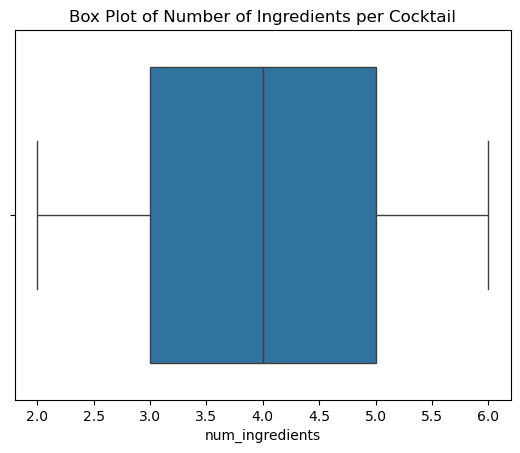

In [24]:
df['num_ingredients'] = df['ingredients'].apply(len)

sns.boxplot(x = 'num_ingredients', data=df)
plt.title('Box Plot of Number of Ingredients per Cocktail')
plt.show()

#### Conclusions
There are no outliers to be handled

# Summary
1. Change categorical columns datatype to category.
2. Ingredients column:
   - Extract the information about a number of ingredients to a separate column.
   - Encode 20 most used ingredients.
3. Category:
   - One binary column that states whether the cocktail is ordinary or not.
4. Glass:
   - Generalize the categories that appear two times or less into "others" type.
   - Perform one hot encoding.
5. Delete Instructions, ImageUrl, createdAt and updatedAt columns to avoid unnecessary noise.
6. Alcoholic.
7. Tags:
   - binary column for "IBA" tag